In [26]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib widget
import numpy as np
from scipy.optimize import curve_fit                        # Funktionsfit:     popt, pcov = curve_fit(func, xdata, ydata) 
from uncertainties import ufloat                            # Fehler:           fehlerwert =  ulfaot(x, err)
from uncertainties.unumpy import uarray                     # Array von Fehler: fehlerarray =  uarray(array, errarray)
from uncertainties.unumpy import (nominal_values as noms,   # Wert:             noms(fehlerwert) = x
                                  std_devs as stds)         # Abweichung:       stds(fehlerarray) = errarray
from uncertainties import unumpy as unp 
import scipy.constants as const

Tabelle: Kennlinien

In [27]:
md1 = pd.read_csv('tables/md1.csv')
print(md1.to_latex(index = False, column_format= "c c c c c c", decimal=',')) 

\begin{tabular}{c c c c c c}
\toprule
 U/V &  I/mA &  I/mA.1 &  I/mA.2 &  I/mA.3 &  I/mA.4 \\
\midrule
   0 &  0,00 &    0,00 &    0,00 &   0,000 &    0,00 \\
   5 &  0,01 &    0,01 &    0,01 &   0,020 &    0,03 \\
  10 &  0,03 &    0,04 &    0,05 &   0,050 &    0,10 \\
  15 &  0,05 &    0,06 &    0,10 &   0,100 &    0,18 \\
  20 &  0,07 &    0,09 &    0,16 &   0,200 &    0,26 \\
  25 &  0,08 &    0,12 &    0,22 &   0,290 &    0,37 \\
  30 &  0,08 &    0,14 &    0,26 &   0,370 &    0,48 \\
  35 &  0,08 &    0,15 &    0,29 &   0,450 &    0,60 \\
  40 &  0,08 &    0,15 &    0,32 &   0,510 &    0,72 \\
  45 &  0,08 &    0,15 &    0,33 &   0,570 &    0,86 \\
  50 &  0,08 &    0,17 &    0,34 &   0,620 &    0,99 \\
  60 &   NaN &     NaN &    0,35 &   0,690 &    1,25 \\
  70 &   NaN &     NaN &    0,36 &   0,730 &    1,48 \\
  80 &   NaN &     NaN &     NaN &   0,750 &    1,68 \\
  90 &   NaN &     NaN &     NaN &   0,760 &    1,89 \\
 100 &   NaN &     NaN &     NaN &   0,770 &    2,07 \\
 

Daten auswerten:

In [28]:
np.savetxt('tables/md1.txt', md1.values, fmt='%.3f')
U, k1, k2, k3, k4, k5 = np.genfromtxt('tables/md1.txt', unpack=True)

Plot 1:

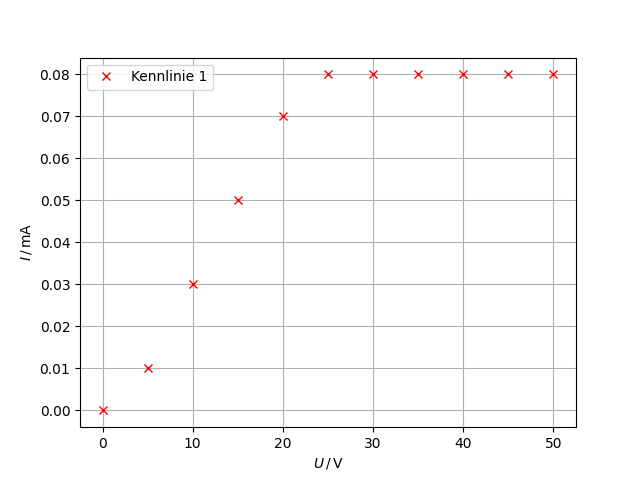

In [29]:
plt.plot(U, k1, 'xr', label = "Kennlinie 1", zorder=2)

plt.xlabel(r'$U \, / \, \mathrm{V}$')
plt.ylabel(r'$I \, / \, \mathrm{mA}$')
plt.legend(loc="best")     
plt.grid(True)

plt.show()

Plot 2:

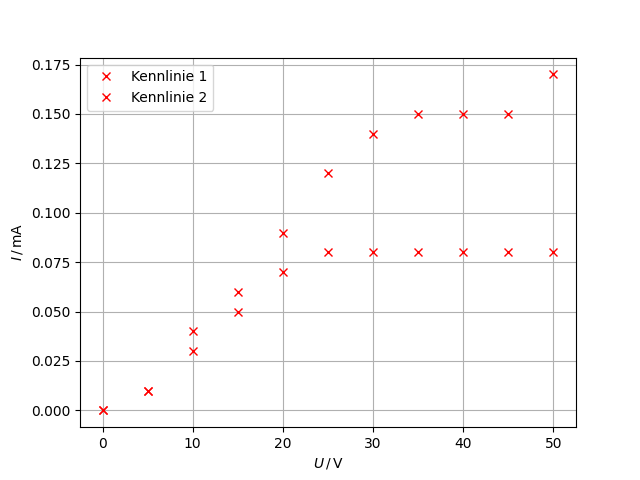

In [30]:
plt.plot(U, k2, 'xr', label = "Kennlinie 2")

plt.xlabel(r'$U \, / \, \mathrm{V}$')
plt.ylabel(r'$I \, / \, \mathrm{mA}$')
plt.legend(loc="best")     
plt.grid(True)


Plot 3:

In [31]:
plt.plot(U, k3, 'xr', label = "Kennlinie 3")

plt.xlabel(r'$U \, / \, \mathrm{V}$')
plt.ylabel(r'$I \, / \, \mathrm{mA}$')
plt.legend(loc="best")     
plt.grid(True)   

Plot 4:

In [32]:
plt.plot(U, k4, 'xr', label = "Kennlinie 4")

plt.xlabel(r'$U \, / \, \mathrm{V}$')
plt.ylabel(r'$I \, / \, \mathrm{mA}$')
plt.legend(loc="best")     
plt.grid(True)   

Plot 5:


Plot 5: Berechnung der Parameter mithilfe des Raumladungsgesetzes

In [33]:
plt.plot(U, k5, 'xr', label = "Kennlinie 5", zorder=2, alpha = 0.7)

def lsr(u, a, b):
    return (4/9) * const.epsilon_0 * np.sqrt(2 * const.elementary_charge/ const.electron_mass) * u**(b)/a**2

para, pcov = curve_fit(lsr, U[:15], k5[:15])
a, b = para
fa, fb = np.sqrt(np.diag(pcov))

ua = ufloat(a, fa) 
ub = ufloat(b, fb)

xx = np.linspace(0, 280, 100)
plt.plot(xx, lsr(xx, noms(ua), noms(ub)), '-b', label = "Ausgleichsfunktion", linewidth = 1, zorder=1)

plt.xlabel(r'$U \, / \, \mathrm{V}$')
plt.ylabel(r'$I \, / \, \mathrm{mA}$')
plt.legend(loc="best")     
plt.grid(True)
plt.xlim(-10, 150)
plt.ylim(-0.1, 3)

ua = ua*10**3
print(1/ua**2)
print(ub)
print('a = (%.3f +- %.3f)*10-3' % (noms(ua), stds(ua)))
print('b = (%.3f +- %.3f)' % (noms(ub), stds(ub)))

abw = 1-noms(ub)/1.5
print('Abweichung von b = 1,5:', np.round(abw, 2), '%')

0.0033+/-0.0004
1.232+/-0.031
a = (-17.475 +- 1.148)*10-3
b = (1.232 +- 0.031)
Abweichung von b = 1,5: 0.18 %


Tabelle Anlaufstrom:

In [34]:
md2 = pd.read_csv('tables/md2.csv')
print(md2.to_latex(index = False, column_format= "c c", decimal=',')) 

\begin{tabular}{c c}
\toprule
 U/V &    I/nA \\
\midrule
0,00 & 13,0000 \\
0,10 &  8,1000 \\
0,20 &  4,6500 \\
0,30 &  2,5000 \\
0,40 &  1,2000 \\
0,50 &  0,4500 \\
0,60 &  0,4000 \\
0,70 &  0,2000 \\
0,80 &  0,0600 \\
0,90 &  0,0230 \\
0,96 &  0,0005 \\
\bottomrule
\end{tabular}



In [35]:
np.savetxt('tables/md2.txt', md2.values, fmt='%.4f')
U, I = np.genfromtxt('tables/md2.txt', unpack=True)

plt.plot(U, I, 'xr', label = "Messdaten",  alpha = 0.7)

def f(u, a, b):
    return a * np.exp(-u / b)

para, pcov = curve_fit(f, U, I)
a, b = para
fa, fb = np.sqrt(np.diag(pcov))

ua = ufloat(a, fa) 
ub = ufloat(b, fb)

xx = np.linspace(-0.5, 1.5, 100)
plt.plot(xx, f(xx, a, b), '-b', label = "Ausgleichsfunktion")

plt.xlabel(r'$U \, / \, \mathrm{V}$')
plt.ylabel(r'$I \, / \, \mathrm{nA}$')
plt.legend(loc="best")     
plt.grid(True)
plt.xlim(0, 1.05)
plt.ylim(-0.5, 9)

ub = const.elementary_charge * ub / const.Boltzmann # nach umformen im exponenten

print(a)
print(b)

print('a = (%.3f +- %.3f) nA' % (noms(ua), stds(ua)))
print('b = (%.3f +- %.3f) K' % (noms(ub), stds(ub)))

13.22754690492755
0.1836761355495992
a = (13.228 +- 0.240) nA
b = (2131.473 +- 70.377) K


Temperaturen berechnen: c)

In [36]:
md3 = pd.read_csv('tables/md3.csv')
np.savetxt('tables/md3.txt', md3.values, fmt='%.1f')
I, U = np.genfromtxt('tables/md3.txt', unpack=True)

def temp(u, i): # Berechnung der Temperatur mit U und I
    f = 0.32; eta = 0.28; sigma = 5.7e-12; Nwl =1
    return ( (u * i - Nwl) / (f*eta*sigma) )**(1/4)

T = temp(U, I)
T = np.round(T, 2)

z = {'U/V': U, 'I/A': I, 'T/K': T}
dz = pd.DataFrame(data=z)
print(dz.to_latex(index = False, column_format= "c c c", decimal=',')) 

\begin{tabular}{c c c}
\toprule
 U/V &  I/A &     T/K \\
\midrule
 4,5 &  1,9 & 1960,83 \\
 4,9 &  2,0 & 2037,39 \\
 5,0 &  2,1 & 2076,75 \\
 5,5 &  2,2 & 2159,16 \\
 6,2 &  2,4 & 2283,24 \\
\bottomrule
\end{tabular}



Berechnung der Austrittsarbeit: e)

In [37]:
def a(t):   # Austrittsarbeit
    kb = const.Boltzmann
    e0 = const.elementary_charge
    m0 = const.electron_mass
    h = const.Planck
    Is = [0.12, 0.27, 0.6, 1.2, 2.1]
    Is = np.multiply(Is, 1000)    # Sättigungstrom in Ampere
    f = 0.32e-2                   # Fläche in m
    js = Is/f                     # Sättigungsstromdichte
    return - T * kb * np.log( js * h**3 / (4*np.pi*e0*m0*kb**2 * T**2) )

WJ = a(T)
WeV = a(T)/const.e
print('W/J =', WJ)
print('W/eV =', WeV)
print('Mittelwert und Fehler: (%.3f +- %.3f) eV' % (np.mean(WeV), np.std(WeV)), '\n')

K = ['Kennlinie 1', 'Kennlinie 2', 'Kennlinie 3', 'Kennlinie 4', 'Kennlinie 5']
z = {' ': K, 'Wa/eV': np.round(a(T)/const.e, 3), 'Wa/J*10**-19': np.round(a(T)*10**19, 3)}
dz = pd.DataFrame(data=z)
print(dz.to_latex(index = False, column_format= "c c c", decimal=',')) 


W/J = [5.04339135e-19 5.03374872e-19 4.91301452e-19 4.92454513e-19
 5.06636062e-19]
W/eV = [3.14783729 3.14181883 3.06646247 3.07365931 3.16217358]
Mittelwert und Fehler: (3.118 +- 0.040) eV 

\begin{tabular}{c c c}
\toprule
            &  Wa/eV &  Wa/J*10**-19 \\
\midrule
Kennlinie 1 &  3,148 &         5,043 \\
Kennlinie 2 &  3,142 &         5,034 \\
Kennlinie 3 &  3,066 &         4,913 \\
Kennlinie 4 &  3,074 &         4,925 \\
Kennlinie 5 &  3,162 &         5,066 \\
\bottomrule
\end{tabular}

